# MT Car Dataset

#### <span style="color:green">Question - 1. </span> Is a car with automatic or manual transmission better in term of miles per gallons (mpg)?

#### <span style="color:green">Question - 2. </span>  Quantify the *mpg* difference between automatic and manual transmission

- mpg - mile per gallon

# 1. Univarient Analysis

- I focus on analyzing the target variable (mpg) alone by splitting the observations into two groups, i.e. cars wtih automatic or manual transmission. I will execute 2 analysis
- Validate if the difference of the group means is statistically significant by computing a 95% confidence interval for means difference.

### Automatic vs Manual Transmission 
in terms of miles per gallon (mpg)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

**Load Dataset**

In [5]:
mtcar = pd.read_excel('./DataSet/MTcars.xlsx')
mtcar

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


|coloumns | description |
|---------|-------------|
|mpg	|Miles/(US) gallon
|cyl	|Number of cylinders
|disp	|Displacement (cu.in.)
|hp	|Gross horsepower
|drat	|Rear axle ratio
|wt	|Weight (1000 lbs)
|qsec|	1/4 mile time
|vs|	V/S
|am	|Transmission (0 = automatic, 1 = manual)
|gear|	Number of forward gears
|carb|	Number of carburetors


# Lets see how Transmission related to miles/galon

- Target variable = mile per galon
- independent variable = transmission

> **Labeling data automatic gear and manual gear**

In [3]:
auto = mtcar[mtcar.am ==1]
manu = mtcar[mtcar.am ==0]
xmanu = np.arange(-0.5,0.5,1/len(manu))
xauto = np.arange(0.6,1.6,1/len(auto))

In [7]:
auto.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
17,Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
18,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2


In [8]:
manu.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2


In [9]:
x = auto['mpg']

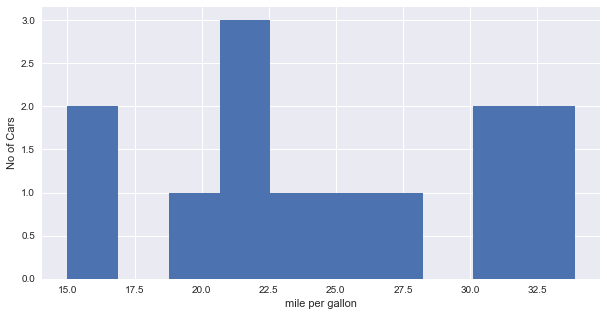

In [17]:
plt.figure(figsize=(10,5))
plt.hist(x)
plt.xlabel('mile per gallon')
plt.ylabel('No of Cars')
plt.show()

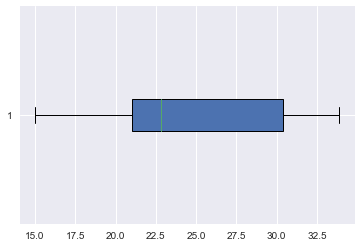

In [21]:
plt.boxplot(x,vert=False,patch_artist=True)
plt.show()

In [22]:
auto.keys()

Index(['model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb'],
      dtype='object')

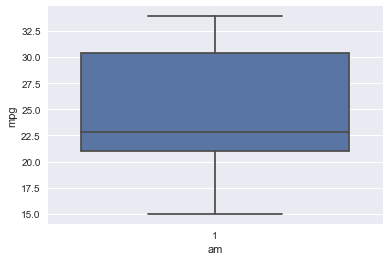

In [24]:
sns.boxplot(x='am',y='mpg',data=auto)
plt.show()

In [28]:
mtcar.keys()

Index(['model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb'],
      dtype='object')

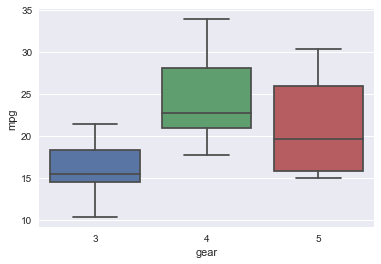

In [31]:
sns.boxplot(x='gear',y='mpg',data=mtcar)

### Distribution of car by Manual Gear

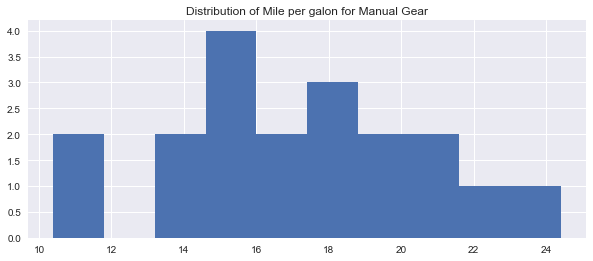

In [4]:
plt.figure(figsize=(10,4))
plt.hist(manu['mpg'])
plt.title('Distribution of Mile per galon for Manual Gear')
plt.show()

In [5]:
print('Mean = ',manu['mpg'].mean())
print('Median = ',manu['mpg'].median())
print('Variance = ',manu['mpg'].var())
print('Standard Deviation = ',manu['mpg'].std())

Mean =  17.147368421052633
Median =  17.3
Variance =  14.699298245614033
Standard Deviation =  3.833966385561307


In [50]:
des_manu =manu['mpg'].describe()
des_manu

count    19.000000
mean     17.147368
std       3.833966
min      10.400000
25%      14.950000
50%      17.300000
75%      19.200000
max      24.400000
Name: mpg, dtype: float64

### Distribution of car by Automation Gear

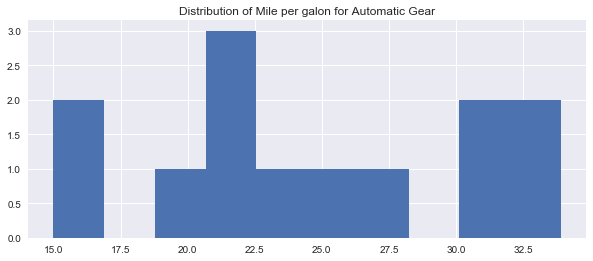

In [7]:
plt.figure(figsize=(10,4))
plt.hist(auto['mpg'])
plt.title('Distribution of Mile per galon for Automatic Gear')
plt.show()

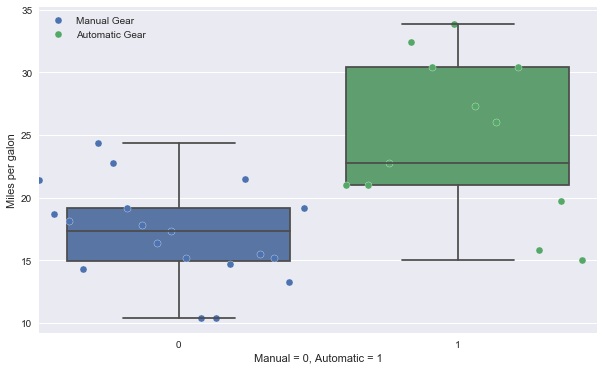

In [8]:


# plotting scatter and boxplot
plt.figure(figsize=(10,6))
plt.scatter(xmanu,manu['mpg'],edgecolor='w',s=50)
plt.scatter(xauto,auto['mpg'],edgecolor='w',s=50)
plt.legend(['Manual Gear','Automatic Gear'])
sns.boxplot(x='am',y='mpg',data=mtcar)
plt.xlabel('Manual = 0, Automatic = 1')
plt.ylabel('Miles per galon')
plt.show()

In [53]:
print('Mean = ',auto['mpg'].mean())
print('Median = ',auto['mpg'].median())
print('Variance = ',auto['mpg'].var())
print('Standard Deviation = ',auto['mpg'].std())

des_auto = auto['mpg'].describe()
des_auto

Mean =  24.39230769230769
Median =  22.8
Variance =  38.02576923076922
Standard Deviation =  6.166503809353338


count    13.000000
mean     24.392308
std       6.166504
min      15.000000
25%      21.000000
50%      22.800000
75%      30.400000
max      33.900000
Name: mpg, dtype: float64

pd.DataFrame(des_auto).transpose()[['25%','50%','75%']].plot(kind='bar',stacked='True')
